# Classificatie - Logistic Regression

## Wat is classificatie?

Bij regressie wordt er getracht een manier te zoeken om op basis van een aantal inputs/features een continue waarde te voorspellen.
Bij classificatie omvat machine learning technieken waar een model getrained wordt dat op basis van de input bepaalt in welke categorieen je input thuishoort.
Een model dat een categorie toekent aan een bepaalde set input-data kan ook een **classifier** genoemd worden.
Het classificatieprobleem hoort nog steeds thuis onder **supervised learning** omdat er nog steeds gebruikt gemaakt wordt van een output/label/target om het model te trainen.

Enkele voorbeelden van classificatieproblemen zijn
* Spam detectie
* Medische diagnoses
* Kwaliteitscontrole
* Geschreven tekst inlezen
* ...


## Types van classifiers

Op basis van hoe de data gelabeled wordt kunnen we drie types van classifiers onderscheiden:
* Binaire classifier: Er zijn twee verschillende klasses (goedgekeurd of niet, kwaadaardig vs goedaardig, ...). Lijkt simplistisch maar komt heel veel voor.
* Multiclass classifier: Er zijn een willekeurig aantal klassen en er kan er maar 1 toegekend worden. Een voorbeeld hiervan is gezichtsherkenning (elk gezicht kan maar bij 1 persoon horen).
* Multilabel classifier: Er zijn een willekeurig aantal klassen en 1 input kan tot meerdere klassen behoren, bijvoorbeeld op een foto kan je meerdere zaken herkennen zoals een boom, wolken, gras, struiken, dieren, ...

## Kan hier ook lineaire regressie gebruikt worden?

Een eerste mogelijkheid om classificatie uit te voeren is om elke klasse een apart getal te geven en dan lineaire regressie uit te voeren.
Hierdoor bekomen we een getal en dan kunnen we kijken naar welk cijfer/klasse er het dichts bij licht.
De problemen met deze aanpak kunnen het makkelijkst worden toegelicht doorm iddel van een voorbeeld.
Doorheen deze notebook gaat er grotendeels gewerkt worden met [deze dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset) die 7 zaken gemeten heeft in het gezicht van zowel mannen als vrouwen.
Deze dataset gaan we gebruiken om op basis van deze metingen te gaan bepalen of de bijhorende persoon een vrouw of man is.

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od

# graphical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from ipywidgets import interact, FloatSlider
import matplotlib.animation as animation
import seaborn as sns
sns.set_style("darkgrid")

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline

In [4]:
# od.download("https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit")

In [3]:
df = pd.read_csv(".\\oranges-vs-grapefruit\\citrus.csv")

In [4]:
df["output"] = df.name == "orange"
df

,name,diameter,weight,red,green,blue,output
0,orange,2.96,86.76,172,85,2,True
1,orange,3.91,88.05,166,78,3,True
2,orange,4.42,95.17,156,81,2,True
3,orange,4.47,95.60,163,81,4,True
4,orange,4.48,95.76,161,72,9,True
...,...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20,False
9996,grapefruit,15.41,254.67,148,68,7,False
9997,grapefruit,15.59,256.50,168,82,20,False
9998,grapefruit,15.92,260.14,142,72,11,False


Waneer we nu een scatterplot tekenen van een kleine datasample en lineaire regressie zouden laten uitvoeren bekomen we onderstaand resultaat.
Voor classificatie zouden we beslissen dat wanneer het minder is dan de helft, dat het dan een orange is en anders pompelmoes.

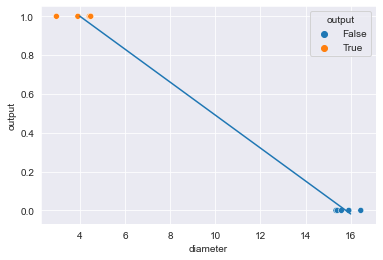

In [9]:
def split(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return s.tail()
df_trimmed = df.groupby(["name"]).apply(split)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

Met deze plot zou je kunnen denken dat lineaire regressie kan gebruikt worden.
Daarom hebben we eens een andere groep ook geplot en daar zie je dat er toch een aantal problemen zijn met lineaire regressie te gebruiken voor classificatie.
* Outliers hebben een grote impact op de trendlijn en dus op de manier dat de classificatie gebeurd
* Als de ene klas 0 is en de andere 1, dan kunnen we waarden voorspellen die kleiner zijn dan 0 en groter dan 1. Dit komt niet overeen met kansen dus is het lastiger om te interpreteren. 
* Als de klassen niet gebalanceerd zijn kan het zijn dat er een grotere bias is voor de ene klassen. Dit wordt ook hieronder. aangetoond.

De combinatie van deze problemen zorgt ervoor dat lineaire regressie zelden een goede oplossing is voor classificatieproblemen.
Gelukkig bevat het domein van classificatie een hele hoop machine learning technieken die beter bestand zijn tegen deze problemen.
In de loop van de cursus gaan we er een aantal van bestuderen, namelijk:
* Logistic Regression
* SVM
* Naive Bayes
* Decision Trees
* Random Forest

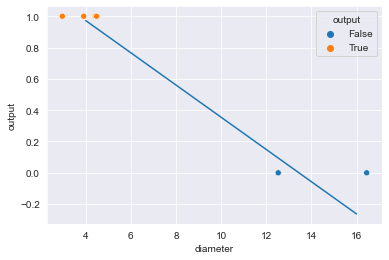

In [10]:
def split_outlier(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return pd.concat([s.tail(1), s[-1000:-995]])
df_trimmed = df.groupby(["name"]).apply(split_outlier)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

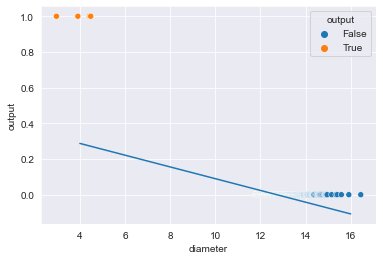

In [11]:
def split_inbalanced(group):
    s = group.sort_values("weight")
    if group.name == "orange":
        return s.head()
    return s.tail(2000)
df_trimmed = df.groupby(["name"]).apply(split_inbalanced)

model = LinearRegression()
model.fit(pd.DataFrame(df_trimmed.diameter), df_trimmed.output)
x_test = [4, 16]
y_test = model.predict(pd.DataFrame(x_test))

sns.scatterplot(x = 'diameter', y ='output', data=df_trimmed, hue='output')
plt.plot(x_test, y_test)

## Evaluatie van classificatie

In tegenstelling tot lineaire regressie kunnen we niet de afstand tot de gewenste output gebruiken om verschillende classifiers te gaan evalueren.
Een mogelijkheid die kan werken is om te kijken naar het percentage van inputs die correct geklassificieerd zijn.
Dit wordt ook de accuraatheid of accuracy genoemd.
Enkel deze metriek gebruiken heeft echter problemen bij het classificieren van zeldzame events of niet-gebalanceerde data.
Een classifier zou bijvoorbeeld voor iets dat in maar 1 van de 1000 gevallen voorkomt kunnen voorspellen dat het nooit voorkomt maar toch een accuraatheid bekomen van 99,9%.

Om dit op te vangen kan de zogenoemde [confusionmatrix](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826) bepaald worden.
Hierin wordt bijgehouden voor elke klasse hoeveel voorspellingen er correct waren en hoeveel niet.
Op basis van deze matrix kunnen de volgende metrieken berekend worden:
* Accuraatheid: algemene correctheid $\frac{TP+TN}{TP+TN+FP+FN}$
* Precisie: Accuraatheid binnen positieve voorspellingen $\frac{TP}{TP+FP}$
* Specificiteit: Accuraatheid binnen negatieve samples $\frac{TN}{TN+FP}$
* Recall: Accuraatheid binnen positieve samples $\frac{TP}{TP+FN}$
* F1-score: Combinatie Precisie en Recall: $2\frac{Precisie*Recall}{Precisie+Recall} = \frac{2TP}{2TP+FP+FN}$

De [.score](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) functie van het LogisticRegression model berekent de accuraatheid van het model maar de andere metrieken kunnen een veel nauwkeuriger beeld geven over de correcte werken van het model.

![matrix](images/confusionMatrix.png)

## Multi-class classification

In het bovenstaande voorbeeld zijn de training examples onderverdeeld in twee klassen.
In de praktijk komt het ook vaak voor dat er meerdere klasses mogelijk zijn, zoals meerdere types fruit, meerdere soorten hondenrassen, ...
Om dit aan te pakken zijn er twee veelgebruikte technieken: One vs All en One vs One.
Meer informatie over hoe de LogisticRegression van sklearn kan gebruikt worden voor multi-class problemen op te lossen vind je [hier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
Dan gaat het specifiek om het multi-class probleem.

### One vs All

Bij deze techniek maak 1 classifier per klasse die je hebt.
Deze classifier bepaalt of een input van die bepaalde klasse is of niet.
Met deze techniek worden er dus N classifiers getrained.
Het voordeel hiervan is dat er minder classifiers nodig zijn dan in de One-Vs-One-techniek waardoor het sneller te trainen is.
Het nadeel echter is dat de techniek gevoeliger is aan niet-gebalanceerde data.
Deze techniek wordt ook vaak One-Vs-The-Rest genoemd.

Een opmerking bij techniek is dat het mogelijk is dat twee of meerdere classifiers aangeven dat een input tot die klasse hoort.
In het geval dat er een dergelijk conflict opduikt wordt de klasse die de hoogste kans aangeeft gekozen. 

![onevsall](images/oneVsAll.png)

### One vs One

Bij deze techniek maken we een classifier aan voor elke combinatie van 2 klassen aan. 
Hierdoor zijn er $\frac{N(N-1)}{2}$ classifiers nodig wat snel kan oplopen in vergelijking met de voorgaande techniek.
Op basis van onderstaand voorbeeld werkt deze techniek als volgt:
* Eerst wordt er gekeken of de input van de rode of de blauwe klasse is. 
* Indien het niet van de rode is, wordt er nog gekeken of het blauw of groen is.
* Indien het niet de blauwe klasse is, wordt er nog gekeken of het rood of groen is.

Hoewel deze methode een grotere trainingstijd nodig heeft door het toegenomen aantal classifiers zijn er wel een aantal voorbeelden:
* Minder gevoelig voor niet gebalanceerde data
* Geen wazige gebieden waar meerdere classifiers kunnen voorspellen dat het van die klasse is.

![onevsall](images/oneVsOne.png)

### Multinomial

Sommige van de solvers in logistic regression maken het ook mogelijk om rechtstreeks te werken met meerdere klassen. In deze gevallen kan het "multi-class" argument op "multinomial" gezet worden. Dit is het standaard gedrag tenzij de solver op "liblinear" staat.

In [ ]:
OneVsOneClassifier()
OneVsRestClassifier()

### Multiclass evaluatie

De confusion matrix in het geval van meerdere klassen kan uitgebreid worden naar onderstaand voorbeeld voor drie klassen. 

![matrix](images/confusionMatrixMulti.png)

Hier is het niet rechtstreeks zichtbaar wat de True Positive, True Negative, ... waarden zijn.
We kunnen deze echter eenvoudig berekenen per klasse. 
Dan kunnen we de besproken metrieken ook per klasse berekenen zodat we onderstaande resultaten bekomen.

![matrix](images/metriekenMulti.png)

Met behulp van deze matrix kunnen verschillende modellen vergeleken worden.
Echter kan er nog iets verder gegaan worden in het combineren van waarden door een globale F1-score te bepalen.
Hier zijn meerdere opties voor, namelijk:
* Micro F1: Globale F1 op basis van total TP, FN en FP. Merk op dat door geen onderscheid te maken tussen klassen dat $Micro F1 = Precisie = Recall = Accuraatheid$
* Macro F1: (Niet gewogen) Gemiddelde van alle F1-scores per klasse.
* Weighted F1: Gewogen gemiddelde van de F1-scores per klasse (gewichten = aantal samples van die klasse)

## Voorbeeld

Gebruik nu [deze dataset](https://www.kaggle.com/c/titanic/overview) om onderstaande vragen op te lossen:
* Maak een model om op basis van de kolommen te voorspellen of een bepaalde passagier de tocht op de titanic zou overleven
* Bereken voor dit model de accuraatheid, recall, precisie en F1-score. 
* Probeer hogere-orde features te gebruiken om deze waarden te verhogen
* Maak een scatter plot voor de leeftijd vs hoeveel er betaald was voor het ticket. Geef ook aan welke datapunten de ramp overleefd hebben en welke niet.
* Maak nu een one-vs-all en one-vs-one classifier aan om de klasse van een persoon te voorspellen op basis van de andere gegevens. Gebruik hiervoor niet de testset omdat hier geen data voor beschikbaar is in de testset maar splits je trainingsset op in twee delen.
* Schrijf nu een functie om de confusion matrix en de metrieken per klasse en de gecombineerde F1-scores te bepalen. Zoek naar het beste model.
* Welke hyperparameters heb je gebruikt tijdens het zoeken naar het model? Hoeveel parameters heeft je uiteindelijke model?

In [2]:
od.download("https://www.kaggle.com/c/titanic/overview")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jensbaetensodisee
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 1.35MB/s]

In [3]:
from zipfile import ZipFile
zf = ZipFile(".\\titanic\\titanic.zip")
zf.extractall(".\\titanic")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df_train = pd.read_csv(".\\titanic\\train.csv")
df_train.drop(["PassengerId", "Name", "Ticket"], inplace=True, axis=1)
#df_train.info()

# met label encoder
#enc = LabelEncoder()
#df_train.Sex = enc.fit_transform(df_train.Sex)
#df_train.Cabin = enc.fit_transform(df_train.Cabin)
#df_train.Embarked = enc.fit_transform(df_train.Embarked)

# met ordinal encoder
enc = OrdinalEncoder()
categoricals = df_train.select_dtypes("object").columns
df_train[categoricals] = df_train[categoricals].fillna("Unknown")
df_train[categoricals] = enc.fit_transform(df_train[categoricals])

display(df_train.head())

display(df_train.isna().sum())
df_train.fillna(-1, inplace=True)

X=df_train.drop("Survived", axis=1)
y = df_train.Survived

# doe scaling na de eerste keer de logistic regression te fitten en de fout te bespreken.
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,7.2500,147.0,2.0
1,1,1,0.0,38.0,1,0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,147.0,2.0
3,1,1,0.0,35.0,1,0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,8.0500,147.0,2.0


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [3]:
model = LogisticRegression()
# dit gaat klagen over scaling -> herhaal dat dit belangrijk is omdat er voor de fouten de afstand genomen wordt!
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

print("accuracy: ", model.score(X_test, y_test))

print("confusion matrix: ", confusion_matrix(y_test, y_preds))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 84 / (84+27)   (positieve labels alleen standaard)
# andere manieren: average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’
print("precision_score: ", precision_score(y_test, y_preds))
# 84 / (84+31)   (positieve labels alleen standaard)
print("recall_score: ", recall_score(y_test, y_preds))
# berekend uit precision en recall (ongeveer gelijk aan het gemiddelde)
print("f1_score: ", f1_score(y_test, y_preds))

accuracy:  0.7796610169491526
confusion matrix:  [[151  30]
 [ 35  79]]
precision_score:  0.7247706422018348
recall_score:  0.6929824561403509
f1_score:  0.7085201793721974


In [5]:
model.coef_

array([[-0.77614989, -1.33850815, -0.36424739, -0.13809047, -0.08265354,
         0.10382761, -0.13781761, -0.19437803]])

In [10]:
hogere_orde = PolynomialFeatures(3)
X_train_2 = hogere_orde.fit_transform(X_train)
X_test_2 = hogere_orde.transform(X_test)
model = LogisticRegression()
# gaat terug klagen over scaling (de nieuwe features gaan kleiner zijn dan 1 dus volgende toevoegen
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

model = LogisticRegression(C=0.1) # indien na scaling nog klaagt, voeg regularisatie toe (bvb 0.1)
model.fit(X_train_2, y_train)
y_preds = model.predict(X_test_2)

print("accuracy: ", model.score(X_test_2, y_test))
print("precision_score: ", precision_score(y_test, y_preds))
print("recall_score: ", recall_score(y_test, y_preds))
print("f1_score: ", f1_score(y_test, y_preds))

accuracy:  0.8203389830508474
precision_score:  0.8279569892473119
recall_score:  0.6754385964912281
f1_score:  0.7439613526570048


<AxesSubplot:xlabel='Age', ylabel='Fare'>

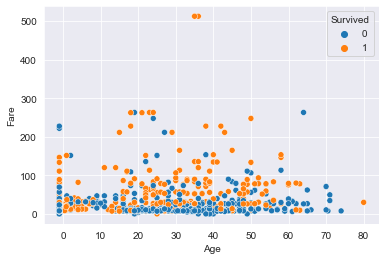

In [14]:
sns.scatterplot(x = 'Age', y ='Fare', data=df_train, hue='Survived')

In [ ]:
ovr = OneVsRestClassifier(LogisticRegression(C=0.1))
ovo = OneVsOneClassifier(LogicsticRegression(C=0.1))

ovo.fit(X_train, X_test)
ovo.predict(X_train,X_test)